# Problem Statement

# Build a Recommendation Engine

This dataset was provided as part of the interview process. The dataset is of restaurants and their reviews provided by customers.

In [1]:
# Import libraries here
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
%matplotlib inline

In [2]:
# Read datasets
dataframe = pd.read_csv("./data/RestoInfo.csv")

In [3]:
# Head of the data
dataframe.head()

Unnamed: 0                          name online_order book_table    rate  \
0       46019        Unique Brew Cafe Resto           No         No     NaN   
1       28849                Jayanthi Sagar           No         No  3.1 /5   
2       19855  Rock Stone Ice Cream Factory          Yes         No   4.0/5   
3       35188         Punjabi by Nature 2.0           No         No  4.2 /5   
4        7070             Rayalaseema Chefs          Yes        Yes   3.9/5   

   votes               location                    rest_type  \
0      0            Indiranagar                  Quick Bites   
1     21  Koramangala 5th Block                  Quick Bites   
2    131                    BTM               Dessert Parlor   
3   3236                    BTM  Casual Dining, Microbrewery   
4    225           Marathahalli                Casual Dining   

                                          dish_liked  \
0                                                NaN   
1                                                NaN   
2  Icecream Cake, Brownie, Waffles, Chocolate Ice...   
3  Paneer Tikki, Mutton Raan, Mango Margarita, Cr...   
4  Bamboo Chicken, Butter Naan, Mutton Biryani, P...   

                                 cuisines approx_cost(for two people)  \
0                               Fast Food                         200   
1     South Indian, North Indian, Chinese                         200   
2                               Ice Cream                         230   
3                            North Indian                         NaN   
4  North Indian, Biryani, Andhra, Chinese                         800   

                                        reviews_list  \
0                                                 []   
1  [('Rated 2.0', "RATEDn  Works only because it'...   
2  [('Rated 4.0', "RATEDn  Ice creams are really ...   
3  [('Rated 3.0', "RATEDn  It has a beautiful amb...   
4  [('Rated 5.0', 'RATEDn  Had Good experience wi...   

                                           menu_item listed_in(type)  \
0                                                 []        Dine-out   
1                                                 []        Dine-out   
2  ['Midnight Indulgence Cake', 'Butterscotch Mel...        Delivery   
3                                                 []        Delivery   
4                                                 []        Delivery   

         listed_in(city)  
0       Old Airport Road  
1  Koramangala 4th Block  
2              Jayanagar  
3  Koramangala 7th Block  
4            Brookefield

In [4]:
# Tail of the data
dataframe.tail()

Unnamed: 0                                     name online_order  \
2064        8778                                  Zeeshan          Yes   
2065       18086                        Zaica Dine & Wine          Yes   
2066       46112  Murphy's Brewhouse - The Paul Bangalore           No   
2067       10808                                  Cee Yem           No   
2068       28875                        Cauvery Fast Food           No   

     book_table    rate  votes               location          rest_type  \
2064         No   3.8/5    214  Koramangala 7th Block      Casual Dining   
2065        Yes   4.0/5   1013            Indiranagar      Casual Dining   
2066        Yes  4.3 /5   2039                 Domlur  Pub, Microbrewery   
2067         No     NaN      0                    BTM        Quick Bites   
2068         No  3.2 /5      4                Ejipura        Quick Bites   

                                             dish_liked  \
2064  Rolls, Kathi Roll, Mutton Roll, Chicken Roll, ...   
2065  Chocolate Pani Puri, Butter Chicken, Gajar Hal...   
2066  Chicken Bruschetta, Tandoori Chicken, Veggie P...   
2067                                                NaN   
2068                                                NaN   

                                    cuisines approx_cost(for two people)  \
2064     North Indian, Kebab, Biryani, Rolls                         700   
2065                            North Indian                       1,200   
2066  Continental, North Indian, Finger Food                       1,700   
2067      South Indian, Kerala, North Indian                         300   
2068                                 Chinese                         150   

                                           reviews_list menu_item  \
2064  [('Rated 1.0', "RATEDn  Pathetic service .we v...        []   
2065  [('Rated 5.0', "RATEDn  This place is located ...        []   
2066  [('Rated 4.0', 'RATEDn  Service - 4/5, Taste -...        []   
2067                                                 []        []   
2068  [('Rated 3.0', 'RATEDn  Small place with minim...        []   

     listed_in(type)        listed_in(city)  
2064        Delivery                    BTM  
2065        Delivery            Indiranagar  
2066   Pubs and bars       Old Airport Road  
2067        Dine-out                    BTM  
2068        Dine-out  Koramangala 4th Block

In [5]:
# Setting the index 
dataframe.set_index('Unnamed: 0', inplace=True)

In [6]:
# EDA
# What are the data types?
print("print the data types\n",dataframe.dtypes)

print the data types
 name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


In [7]:
# What is the distribution of numerical columns?
print(dataframe.describe())

             votes
count  2069.000000
mean    276.048333
std     673.916908
min       0.000000
25%       7.000000
50%      43.000000
75%     210.000000
max    7854.000000


In [8]:
# What about categorical variable levels count?
dataframe.describe(include=['object'])

name online_order book_table  rate location    rest_type  \
count               2069         2069       2069  1770     2069         2052   
unique              1665            2          2    55       82           64   
top     Apsara Ice Cream          Yes         No   NEW      BTM  Quick Bites   
freq                   6         1221       1810    89      227          796   

       dish_liked      cuisines approx_cost(for two people) reviews_list  \
count         962          2069                        2053         2069   
unique        825           771                          46         1698   
top       Biryani  North Indian                         300           []   
freq            7           130                         299          268   

       menu_item listed_in(type) listed_in(city)  
count       2069            2069            2069  
unique       483               7              30  
top           []        Delivery             BTM  
freq        1580            1048             154

In [9]:
#Check if there are any na values.
print(dataframe.isna().sum())

name                              0
online_order                      0
book_table                        0
rate                            299
votes                             0
location                          0
rest_type                        17
dish_liked                     1107
cuisines                          0
approx_cost(for two people)      16
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64


In [10]:
# Fill na values.
# Since the columns containing na values are of categorical type so filling the na vlaues with mode.
dataframe = dataframe.fillna(dataframe.mode().iloc[0])
print(dataframe.isna().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64


In [11]:
# Checking the unique valies in all the column:
for i in dataframe.columns:
    print("column Name {} and unique_values\n\n {}".format(i, dataframe[i].unique()))
    print ("---------------------- \n")
    print("column Name {} and total number of unique_values\n {}\n\n".format(i, len(dataframe[i].unique())))

column Name name and unique_values

 ['Unique Brew Cafe Resto' 'Jayanthi Sagar' 'Rock Stone Ice Cream Factory'
 ... 'Zaica Dine & Wine' "Murphy's Brewhouse - The Paul Bangalore"
 'Cee Yem']
---------------------- 

column Name name and total number of unique_values
 1665


column Name online_order and unique_values

 ['No' 'Yes']
---------------------- 

column Name online_order and total number of unique_values
 2


column Name book_table and unique_values

 ['No' 'Yes']
---------------------- 

column Name book_table and total number of unique_values
 2


column Name rate and unique_values

 ['NEW' '3.1 /5' '4.0/5' '4.2 /5' '3.9/5' '4.1 /5' '3.3/5' '4.4/5' '3.8/5'
 '3.1/5' '3.5/5' '3.8 /5' '2.9/5' '4.1/5' '3.7/5' '3.5 /5' '3.4 /5'
 '3.7 /5' '4.5/5' '4.3 /5' '3.6/5' '2.8 /5' '3.2/5' '4.0 /5' '2.9 /5'
 '3.0 /5' '4.4 /5' '3.2 /5' '4.6 /5' '3.9 /5' '3.0/5' '4.8 /5' '3.6 /5'
 '3.3 /5' '4.5 /5' '2.8/5' '3.4/5' '4.2/5' '2.1/5' '4.9 /5' '4.3/5'
 '2.7/5' '2.6/5' '2.7 /5' '2.2/5' '2.4/5' '2.5 

column Name reviews_list and total number of unique_values
 1698


column Name menu_item and unique_values

 ['[]'
 "['Midnight Indulgence Cake', 'Butterscotch Melody Cake', 'Rock With Ferrero Rocher Ice Cream', 'Our Beloved Classic Ice Cream', 'Vanilla French Kisssss Ice Cream', 'An Italian Love Affair Ice Cream', 'Oreo Double Double Ice Cream', 'Hot Chocolate No Mercy Ice Cream [Regular]', 'Lava Meltdown Ice Cream [Regular]', 'All Chocolate No Nonsence', 'Beyond Darkness Beyond Desire', 'Chocolate Passion for Strawberry', 'Nutella Frenzy', 'Doctor Nuts', 'Rocky Off Road', 'Exotic Fruit Trill', 'Fruit Extravaganza', 'Hot Chocolate No Mercy Ice Cream [Regular]', 'Lava Meltdown Ice Cream [Regular]', 'All Chocolate No Nonsence', 'Beyond Darkness Beyond Desire', 'Chocolate Passion for Strawberry', 'Nutella Frenzy', 'Doctor Nuts', 'Rocky Off Road', 'Exotic Fruit Trill', 'Fruit Extravaganza', 'Strawberry Razzmatazz', 'Litchi Double Double', 'Cookies N Creamery Cake', 'Midnight Indulgence Ca

In [12]:
# Changing the columns to appropriate type.

In [13]:
# 1) changing the column "approx_cost(for two people)" numeric.


def remove_comma_symbol(df, comma_columns):
        """
        Reads a dataframe and removes the ',' symbol from the data



        returns the dataframe without comma symbol.
        """
        for col in comma_columns:
            df[col]=df[col].str.replace(',', '').astype('float')

        return df
        
dataframe = remove_comma_symbol(dataframe, ['approx_cost(for two people)'])

In [14]:
# 2) Keeping the values from rate column. Since we know all the ratings are upon 5 Ex: 3/5. So in the keeping only 3.

print(dataframe.rate.unique())
print(dataframe.rate.describe())
def remove_rating_denominator(df, rating_columns):
        """
        Reads a dataframe and removes the ',' symbol from the data



        returns the dataframe without comma symbol.
        """
        for col in rating_columns:
            df[col]=df[col].str.replace('NEW', '3.0') # Replacing 3 based on the 25% of the rate excluding new or -
            df[col]=df[col].str.replace('-', '3.0') # Replacing 3 based on the 25% of the rate excluding new or -
            df[col]=df[col].str.replace(' /5', '')
            df[col]=df[col].str.replace('/5', '')
            df[col]=df[col].astype('float')

        return df
dataframe = remove_rating_denominator(dataframe, ['rate'])

['NEW' '3.1 /5' '4.0/5' '4.2 /5' '3.9/5' '4.1 /5' '3.3/5' '4.4/5' '3.8/5'
 '3.1/5' '3.5/5' '3.8 /5' '2.9/5' '4.1/5' '3.7/5' '3.5 /5' '3.4 /5'
 '3.7 /5' '4.5/5' '4.3 /5' '3.6/5' '2.8 /5' '3.2/5' '4.0 /5' '2.9 /5'
 '3.0 /5' '4.4 /5' '3.2 /5' '4.6 /5' '3.9 /5' '3.0/5' '4.8 /5' '3.6 /5'
 '3.3 /5' '4.5 /5' '2.8/5' '3.4/5' '4.2/5' '2.1/5' '4.9 /5' '4.3/5'
 '2.7/5' '2.6/5' '2.7 /5' '2.2/5' '2.4/5' '2.5 /5' '2.1 /5' '1.8 /5'
 '2.6 /5' '4.7 /5' '-' '2.3/5' '4.6/5' '2.2 /5']
count     2069
unique      55
top        NEW
freq       388
Name: rate, dtype: object


In [15]:
# Seperating numeric, categorical, small text, large text and review columns.
num_attr = ['rate', 'votes', 'approx_cost(for two people)']
cat_attr = ['online_order', 'book_table', 'listed_in(type)']
small_text_attr = ['name', 'location', 'rest_type', 'listed_in(city)']
large_text_attr = ['dish_liked', 'cuisines', 'menu_item']
review = ['reviews_list']

In [16]:
# What is the distribution of numerical columns?
print(dataframe.describe())

              rate        votes  approx_cost(for two people)
count  2069.000000  2069.000000                  2069.000000
mean      3.559111   276.048333                   561.599807
std       0.485207   673.916908                   468.672559
min       1.800000     0.000000                    50.000000
25%       3.000000     7.000000                   300.000000
50%       3.600000    43.000000                   400.000000
75%       3.900000   210.000000                   650.000000
max       4.900000  7854.000000                  4000.000000


In [17]:
# What about categorical variable levels count?
print(dataframe.describe(include=['object']))

                    name online_order book_table location    rest_type  \
count               2069         2069       2069     2069         2069   
unique              1665            2          2       82           64   
top     Apsara Ice Cream          Yes         No      BTM  Quick Bites   
freq                   6         1221       1810      227          813   

       dish_liked      cuisines reviews_list menu_item listed_in(type)  \
count        2069          2069         2069      2069            2069   
unique        825           771         1698       483               7   
top       Biryani  North Indian           []        []        Delivery   
freq         1114           130          268      1580            1048   

       listed_in(city)  
count             2069  
unique              30  
top                BTM  
freq               154  


In [18]:
for i in dataframe.columns:
    print("For column {} below are the top 5 most running items\n".format(i))
    print(dataframe[i].value_counts().head(5))
 

For column name below are the top 5 most running items

Apsara Ice Cream    6
Lassi Shop          6
McDonald's          5
Hottey Smokey       5
Ramji Chaiwale      5
Name: name, dtype: int64
For column online_order below are the top 5 most running items

Yes    1221
No      848
Name: online_order, dtype: int64
For column book_table below are the top 5 most running items

No     1810
Yes     259
Name: book_table, dtype: int64
For column rate below are the top 5 most running items

3.0    431
3.8    162
3.7    154
3.9    140
3.6    134
Name: rate, dtype: int64
For column votes below are the top 5 most running items

0     387
4      50
11     36
5      29
9      29
Name: votes, dtype: int64
For column location below are the top 5 most running items

BTM                      227
JP Nagar                  99
HSR                       99
Koramangala 5th Block     98
Marathahalli              91
Name: location, dtype: int64
For column rest_type below are the top 5 most running items

Quick B

In [19]:
# Visulaizations

In [20]:
# # Distribution of Variables

In [21]:
#  #1) Plotting of online order bar chart

temp = dataframe.online_order.value_counts()
trace = go.Bar(x=temp.index,
              y= np.round(temp.astype(float)/temp.values.sum(),2),
              text = np.round(temp.astype(float)/temp.values.sum(),2),
              textposition = 'auto',
              name = 'Online orders')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Online orders"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Output -> Reporting the output.

59% of the orders are from online orders.

41% of the orders are not from online orders.

Suggestions

i) The key point of drivng the business is online orders.

ii) The restaurant should keep or improve the quality of online services that will attract even more number of customers. Though online customers are more we can increase evn more.

iii) If a new investor is planning to invest in this industry then his investment should be with online orders or online app. 

iv) If a new investor wants to enter the market of food industry then his prime focus should be on online deliveries or online application to get started with. Because most of the customers are ordering online5

In [22]:
# # 2) Plotting of Table bookings bar chart

temp = dataframe.book_table.value_counts()
trace = go.Bar(x=temp.index,
              y= np.round(temp.astype(float)/temp.values.sum(),2),
              text = np.round(temp.astype(float)/temp.values.sum(),2),
              textposition = 'auto',
              name = 'Table bookings')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Table bookings bar chart"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Output -> Reporting the output.

87% of the customers have done table bookings

13% of the customers visit the restaurant without table bookings.

Suggestion

i) Since online orders are more table bookings have also been reduced or less.

ii) If a new investor wants to enter the market of food industry and wants to open a food chain of restaurants then his investment should be as minimal as possible on the decoration or initial investory of chairs  and tables. Because most of the people are ordering online.

In [23]:
# # 3)  Plotting Type of orders distribution bar chart for column 'listed_in(type)'

temp = dataframe['listed_in(type)'].value_counts()
trace = go.Bar(x=temp.index,
              y= np.round(temp.astype(float)/temp.values.sum(),2),
              text = np.round(temp.astype(float)/temp.values.sum(),2),
              textposition = 'auto',
              name = 'Type of orders')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Type of orders distribution bar chart"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Output -> Reporting the output.

In listed_in(type) column

Mode of ordering the food

51% of the orders are from online in delivery section in the given dataset.

36% of the orders are from dineout section in the given dataset.

6% of the orders are from desserts section in the given dataset.

3% of the orders are from Cafes section in the given dataset.

2% of the orders are from drinks & nightlife section in the given dataset.

1% of the orders are from pubs and Bars section in the given dataset.

1% of the orders are from Buffet section in the given dataset.


Suggestions

i)  If a new investor wants to enter the market of food industry and wants to know which dine-out would attract more customers then I would suggest him going for Dine-out or delivery rather than pubs or desserts or bar, etc.

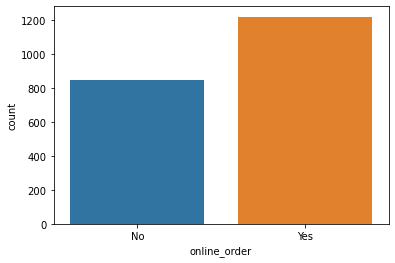

Yes    0.59014
No     0.40986
Name: online_order, dtype: float64


<Figure size 432x288 with 0 Axes>

In [24]:
# plotting using seaborn library.

#  #1) Plotting of online order bar chart
sns.countplot(x="online_order", data=dataframe)
plt.show()
plt.savefig('./plots/online_order.png')
print(dataframe.online_order.value_counts()/dataframe.shape[0])

Output -> Reporting the output.
59% of the orders are from online orders.
41% of the orders are not from online orders.

Suggestions

i) The key point of drivng the business is online orders.

ii) The restaurant should keep or improve the quality of online services that will attract even more number of customers. Though online customers are more we can increase evn more.

iii) If a new investor is planning to invest in this industry then his investment should be with online orders or online app. 

iv) If a new investor wants to enter the market of food industry then his prime focus should be on online deliveries or online application to get started with. Because most of the customers are ordering online5

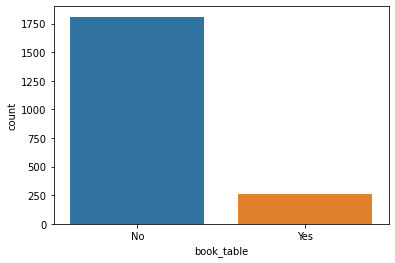

No     0.874819
Yes    0.125181
Name: book_table, dtype: float64


<Figure size 432x288 with 0 Axes>

In [25]:
# # 2) Plotting of Table bookings bar chart

sns.countplot(x="book_table", data=dataframe)
plt.show()
plt.savefig('./plots/book_table.png')
print(dataframe.book_table.value_counts()/dataframe.shape[0])

Output -> Reporting the output.

87% of the customers have done table bookings

13% of the customers visit the restaurant without table bookings.

Suggestion

i) Since online orders are more table bookings have also been reduced or less.

ii) If a new investor wants to enter the market of food industry and wants to open a food chain of restaurants then his investment should be as minimal as possible on the decoration or initial investory of chairs  and tables. Because most of the people are ordering online.

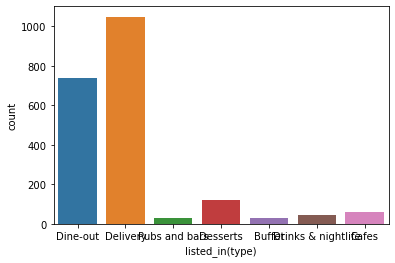

Delivery              0.506525
Dine-out              0.356211
Desserts              0.058966
Cafes                 0.029000
Drinks & nightlife    0.022233
Buffet                0.013533
Pubs and bars         0.013533
Name: listed_in(type), dtype: float64


<Figure size 432x288 with 0 Axes>

In [26]:
# # 3)  Plotting Type of orders distribution bar chart for column 'listed_in(type)'

sns.countplot(x="listed_in(type)", data=dataframe)
plt.show()
plt.savefig('./plots/listed_in_type.png')
print(dataframe['listed_in(type)'].value_counts()/dataframe.shape[0])

Output -> Reporting the output.

In listed_in(type) column

Mode of ordering the food

51% of the orders are from online in delivery section in the given dataset.

36% of the orders are from dineout section in the given dataset.

6% of the orders are from desserts section in the given dataset.

3% of the orders are from Cafes section in the given dataset.

2% of the orders are from drinks & nightlife section in the given dataset.

1% of the orders are from pubs and Bars section in the given dataset.

1% of the orders are from Buffet section in the given dataset.

Suggestions

i)  If a new investor wants to enter the market of food industry and wants to know which dine-out would attract more customers then I would suggest him going for Dine-out or delivery rather than pubs or desserts or bar, etc.

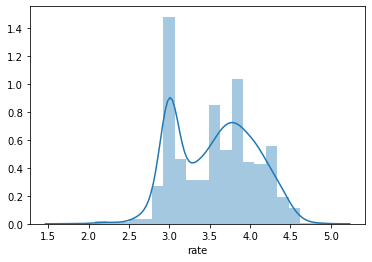

count    2069.000000
mean        3.559111
std         0.485207
min         1.800000
25%         3.000000
50%         3.600000
75%         3.900000
max         4.900000
Name: rate, dtype: float64


<Figure size 432x288 with 0 Axes>

In [27]:
# 4) Distribution of rate column. (Histogram)
sns.distplot(dataframe['rate'])
plt.show()
plt.savefig('./plots/rate.png')
print(dataframe['rate'].describe())

Key findings 

1) The average rating is 3.5

2) 75% of the distribution is under 3.9 rating

3) 25% of the restaurants have rating 4.0 and above

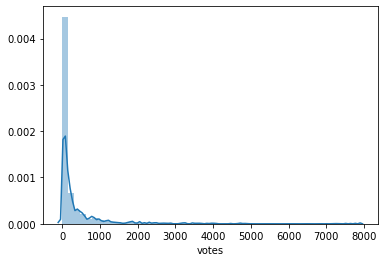

count    2069.000000
mean      276.048333
std       673.916908
min         0.000000
25%         7.000000
50%        43.000000
75%       210.000000
max      7854.000000
Name: votes, dtype: float64

<Figure size 432x288 with 0 Axes>

In [28]:
# 5) Distribution of votes column. (Histogram)
sns.distplot(dataframe['votes'])
plt.show()
plt.savefig('./plots/votes.png')
dataframe['votes'].describe()

**votes can be with respect to the voting given to a order or restaurant.**

75% of the data has voting less than or equal to 210 votes

25% of the data has voting greater than or 210 votes

The average votes for restaurants are around 276. There are few (25%) restaurants for which the votes are above 210 to 8000. We can replace all these values by mean values. To get proper distribution of the graph

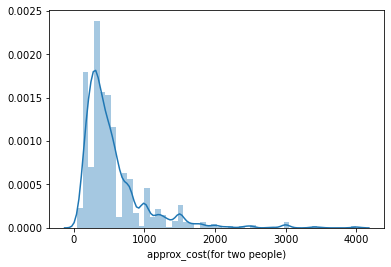

count    2069.000000
mean      561.599807
std       468.672559
min        50.000000
25%       300.000000
50%       400.000000
75%       650.000000
max      4000.000000
Name: approx_cost(for two people), dtype: float64

<Figure size 432x288 with 0 Axes>

In [29]:
# 6) Distribution of approx_cost(for two people) column. (Histogram)
sns.distplot(dataframe['approx_cost(for two people)'])
plt.show()
plt.savefig('./plots/approx_cost_for_two_people_.png')
dataframe['approx_cost(for two people)'].describe()

Key insights

i) Among all the restaurants the average cost for two people is coming upto 561 in this city for which the data is provided. (Bangalore)
From the above distribution we get an understanding that the data has been taken from all types of restaurants cost friendly and expensive.

Suggestions:

If a investor wants to invest or enter the market then he can decide the cost of his dishes or the average cost for two people in his retaurant. A brilliant solution to capture the market he can decide to keep it around 561.

The above plot is with respect to aprroximate cost fo two.

In the above provided dataset the average cost for two is around 561. And 75% of the data lies within 650. Since only 25% of the restaurants belong to category of above 650, we can either remove those restautants, by removing these restaurants we can have the data that belongs to a normal distribution.

The above plot is right skewed.

In [30]:
# 7) Boxplot for approimate cost for two people.
trace1 = go.Box(y = dataframe['approx_cost(for two people)'],name = 'Online order yes',
                boxpoints = 'all',jitter = 1
              )

data = [trace1]
layout = go.Layout(width = 1000,
                  height = 500,title = 'Approximate cost for two people based on online order')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

Key insights and Suggestions

The above box plot will help the owner or investor to set a cap on his prices for the dishes that he provides.

For example median willl tell him to set the prices for most of his dishes.

And with the help of upper and lower whisker and Q1 and Q3 range he can decide most of his food or product prices. 

The price range should be in this range so that he can capture more number of customers in the market. (Ex: min - 50 to max - 1100)

From the above plot we understand how much people spend on food.

In [31]:
# 7) Boxplot for apprimate cost of two people based on online delivery or offline
trace1 = go.Box(y = dataframe['approx_cost(for two people)'][dataframe.online_order=='Yes'],name = 'Online order yes',
                boxpoints = 'all',jitter = 1
              )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = dataframe['approx_cost(for two people)'][dataframe.online_order=='No'],name= 'Online order No',
              boxpoints = 'all',jitter = 1
              )
data = [trace1,trace2]
layout = go.Layout(width = 1000,
                  height = 500,title = 'Approximate cost for two people based on online order and offline order.')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

Key suggestions and insights

Based on the above box plot the invester or owner who is trying to enter the market or an existing restaurant  can decide what shoudl be the range of prices for hsi or her food items. Based on the mode. If he is planning for more of online orders delivery then he can refer to the online order yes data or left boxplot. and if he is planing for an offline restaurant then he can refer the right plot or online order no plot.

In [32]:
# 8) Top 5 locations or areas in bangalore where maximum number of restaurants are taken in this dataset.

labels1 = list(dataframe.location.value_counts().index)
values1 = list(dataframe.location.value_counts().values)
labels1 = labels1[:10]
values1 = values1[:10]


fig = {
    "data":[
        {
            "labels" : labels1,
            "values" : values1,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Restaurant Presence in Bangalore",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Areas",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

Insights

1) Most of the retsurants are from BTM Layout location

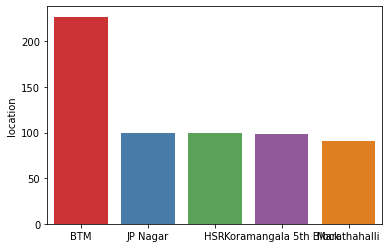

<Figure size 432x288 with 0 Axes>

In [33]:
# Plot using sns library
# 9) Top 5 locations from which the data has been taken
top5 = dataframe.location.value_counts().head()
# f , ax = plt.subplots(1,1,figsize = (8,4))
ax = sns.barplot(top5.index,top5,palette ='Set1')
plt.show()
plt.savefig('./plots/top_5_locations.png')

(-1.1075004323579174,
 1.1003571671725436,
 -1.1023617789533477,
 1.1013302134973137)

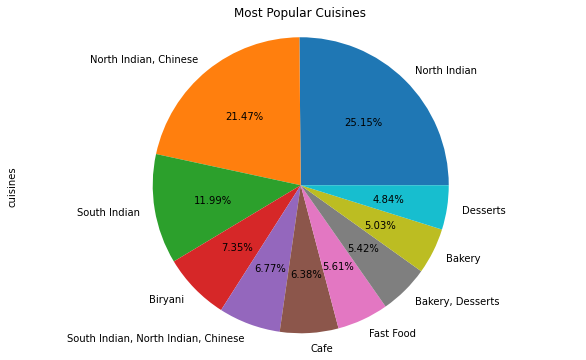

In [34]:
# # 10) Top 10 Cuisines served by restaurants
dataframe['cuisines'].value_counts().sort_values(ascending=False).head(10)
dataframe['cuisines'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6),
title="Most Popular Cuisines", autopct='%1.2f%%')
plt.axis('equal')

Suggestions -> Most of the resturants serve north indian dishes

In [35]:
# # 14) North indian cuisine is the most visited cuisine by users.
total_cuisines = dataframe.cuisines.value_counts()
cuisines = {}
cnt = 0
for i in total_cuisines.index:
    for j in i.split(', '):
        if j not in cuisines.keys():
            cuisines[j] = total_cuisines[cnt]
        else:
            cuisines[j] += total_cuisines[cnt]
    cnt += 1
sorted_cuisines = pd.Series(cuisines).sort_values(ascending=False)

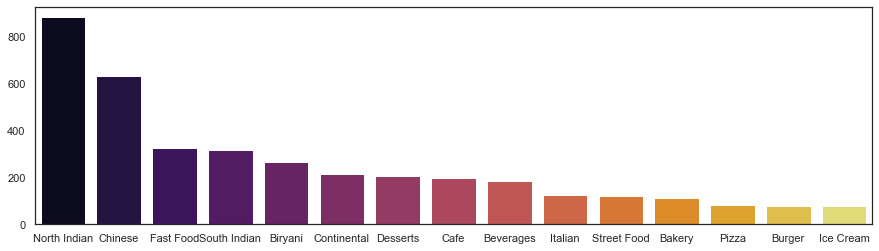

In [36]:
# # 15) Most preferred cuisine

sns.set(style="white")
f, g = plt.subplots(1,1, figsize = (15, 4))
g = sns.barplot(sorted_cuisines[:15].index, sorted_cuisines[:15].values, palette="inferno")

North indian dish is most served cuisine among the restaurants

In [37]:
# 12) Wordcloud

from wordcloud import WordCloud

matplotlib.rcParams['font.size']=12                #10 
matplotlib.rcParams['savefig.dpi']=100             #72 
matplotlib.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None, rating = '1'):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    plt.savefig('./plots/wordcloud_rating_'+rating+".png")

Wordcloud of text where the rating is less than 1


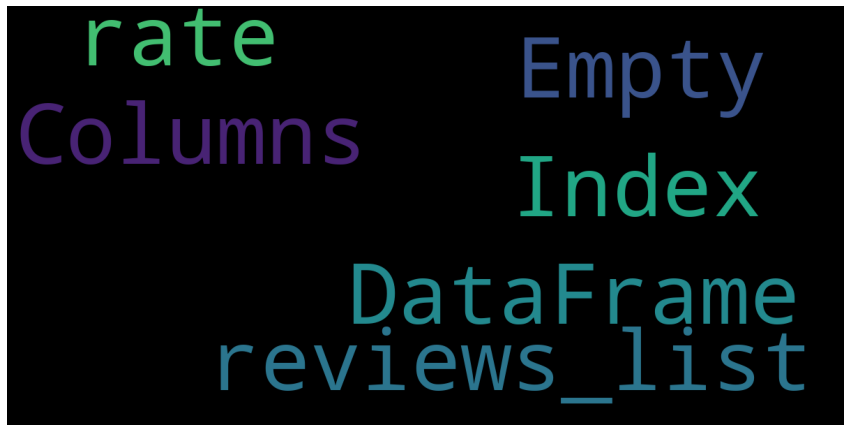

<Figure size 432x288 with 0 Axes>

In [38]:
print("Wordcloud of text where the rating is less than 1")
show_wordcloud(dataframe[["reviews_list", "rate"]][(dataframe.rate >=0) & (dataframe.rate< 1)], rating = '1')

The most common words in rating less than 1 are Dataframe, Index, rate, columns.
We can remove these words

Wordcloud of text where the rating is less than 2 and greater than 1


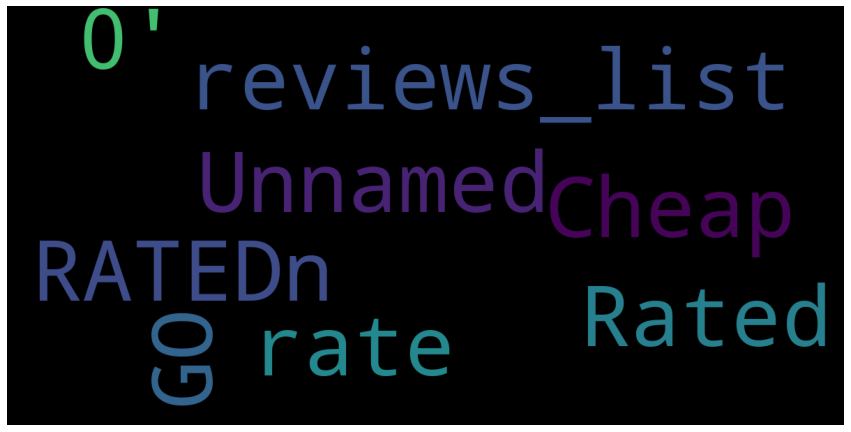

<Figure size 432x288 with 0 Axes>

In [39]:
print("Wordcloud of text where the rating is less than 2 and greater than 1")
show_wordcloud(dataframe[["reviews_list", "rate"]][(dataframe.rate >=1) & (dataframe.rate< 2)], rating = '2')

Wordcloud of text where the rating is less than 3 and greater than 2


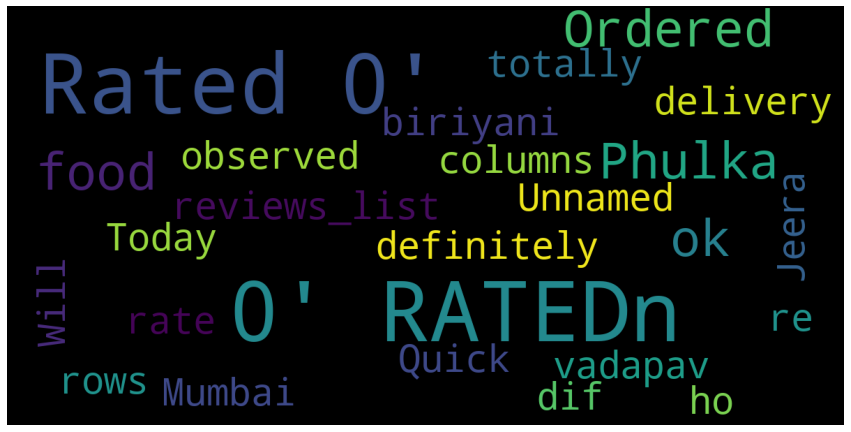

<Figure size 432x288 with 0 Axes>

In [40]:
print("Wordcloud of text where the rating is less than 3 and greater than 2")
show_wordcloud(dataframe[["reviews_list", "rate"]][(dataframe.rate >=2) & (dataframe.rate< 3)], rating = '3')

Wordcloud of text where the rating is less than 4 and greater than 3


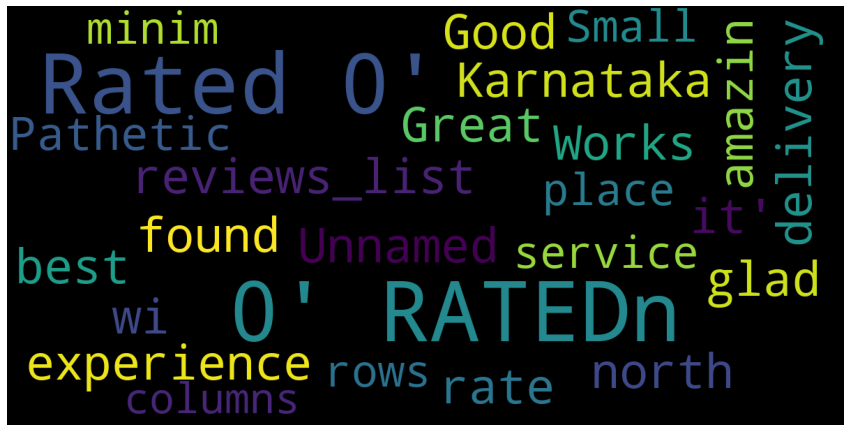

<Figure size 432x288 with 0 Axes>

In [41]:
print("Wordcloud of text where the rating is less than 4 and greater than 3")
show_wordcloud(dataframe[["reviews_list", "rate"]][(dataframe.rate >=3) & (dataframe.rate< 4)], rating = '4')

Wordcloud of text where the rating is less than 5 and greater than 4


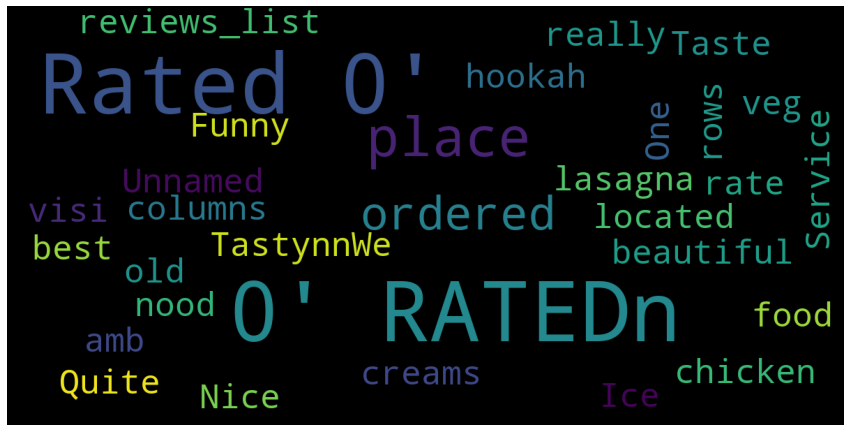

<Figure size 432x288 with 0 Axes>

In [42]:
print("Wordcloud of text where the rating is less than 5 and greater than 4")
show_wordcloud(dataframe[["reviews_list", "rate"]][(dataframe.rate >=4) & (dataframe.rate< 5)], rating = '5')

Key insights 

The wordcloud helped me in understanding what are the words associated with the ratings (rate column).

The restaurants rated low around 1 or 2 had negative words. Example: "cheap"

The restaurants rated high around 4 or 5 had positive words. Example: "beautiful", "Best"

This helps us in understading that the if positive words are there in the review list then the rate or rating for that restaurant is good else it is bad rated based on the negtaive words.

The wordcloud also helped me in undertstand the most common and unwanted words like  "rated_n"," review_list"

In [43]:
# visulaizing after cleaning the text data, removin unwamted words, punctuations.
print("visulaizing after cleaning the text data, removin unwamted words, punctuations.")

visulaizing after cleaning the text data, removin unwamted words, punctuations.


# Code to perform some cleaning in the reviews

We will perform some text cleaning in the data.

    Removing the text from the list
    
    Remove punctuations,
    
    non ascii words
    
    "rated" word as it is repeated more often
    
    New line characters and following text untill space
        
    Extra spaces from the text
    
    Remove all punctuation
    
    Remove all stopwords
    
    Remove the ratings that are there at the starting of the text.


In [44]:
import re
import string
from nltk.corpus import stopwords
stop = []

# Removing the data out of the list # Remoiving the square brackets. or removing the text from the backets.

dataframe['clean_reviews_list'] = dataframe['reviews_list'].str[2:-2]


for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))
stop.extend(['rows', 'columns', 'review_list', 'rated_n', 'rate', 'rated ', 'ratedn', 'clean_review_list',
            'Empty', 'Columns', 'DataFrame', 'Index', 'Unnamed'])

def scrub_words(text):
    """
    Takes in a string of text, then performs the following:
    
    removes unwanted text and spaces from the data
    
    Returns a list of the cleaned text
    """
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    text = re.sub("\[Rated]*",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text
dataframe['clean_reviews_list'] = [scrub_words(text) for text in dataframe['reviews_list']]


def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
#     print(stop)
    return " ".join([word for word in nopunc.split() if word.lower() not in stop])
dataframe['clean_reviews_list'] = dataframe['clean_reviews_list'].apply(text_process)

# Remove ratings that are there in the starting
dataframe['clean_reviews_list'] = [text.replace('Rated', '') for text in dataframe['clean_reviews_list']]
dataframe['clean_reviews_list'] = [re.sub(r'\d+',"", text) for text in dataframe['clean_reviews_list']]

Wordcloud of text where the rating is less than 2 and greater than 1


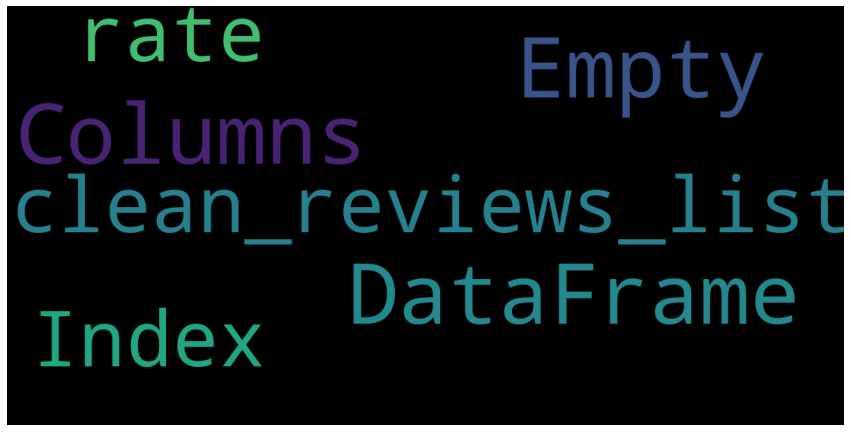

<Figure size 432x288 with 0 Axes>

In [45]:
print("Wordcloud of text where the rating is less than 2 and greater than 1")
show_wordcloud(dataframe[["clean_reviews_list", "rate"]][(dataframe.rate >=0) & (dataframe.rate< 1)], rating = '1')

Wordcloud of text where the rating is less than 2 and greater than 1


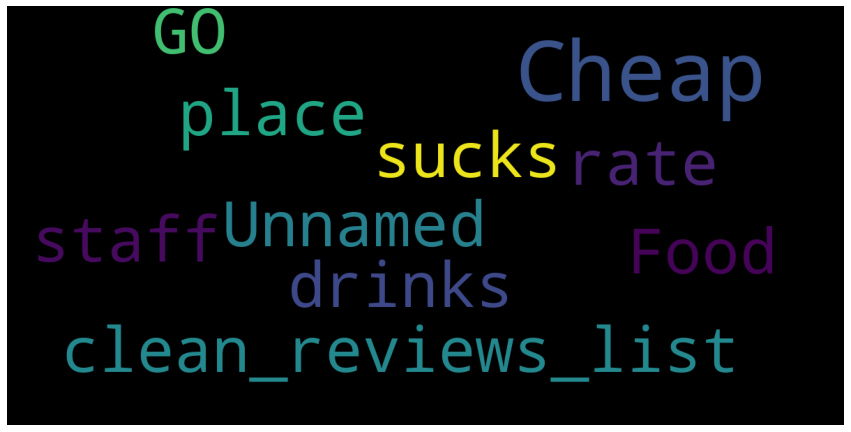

<Figure size 432x288 with 0 Axes>

In [46]:
print("Wordcloud of text where the rating is less than 2 and greater than 1")
show_wordcloud(dataframe[["clean_reviews_list", "rate"]][(dataframe.rate >=1) & (dataframe.rate< 2)], rating = '2')

The restaurants that have rating below 2 have few words that are negative eg: sucks, cheap

Wordcloud of text where the rating is less than 3 and greater than 2


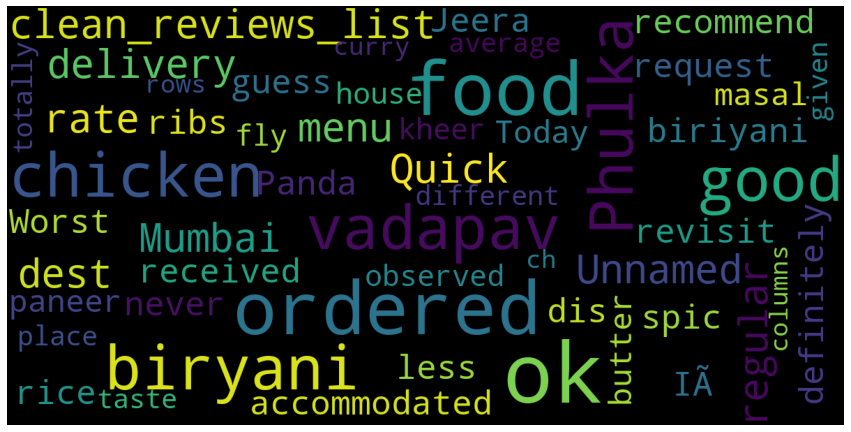

<Figure size 432x288 with 0 Axes>

In [47]:
print("Wordcloud of text where the rating is less than 3 and greater than 2")
show_wordcloud(dataframe[["clean_reviews_list", "rate"]][(dataframe.rate >=2) & (dataframe.rate< 3)], rating = '3')

Wordcloud of text where the rating is less than 4 and greater than 3


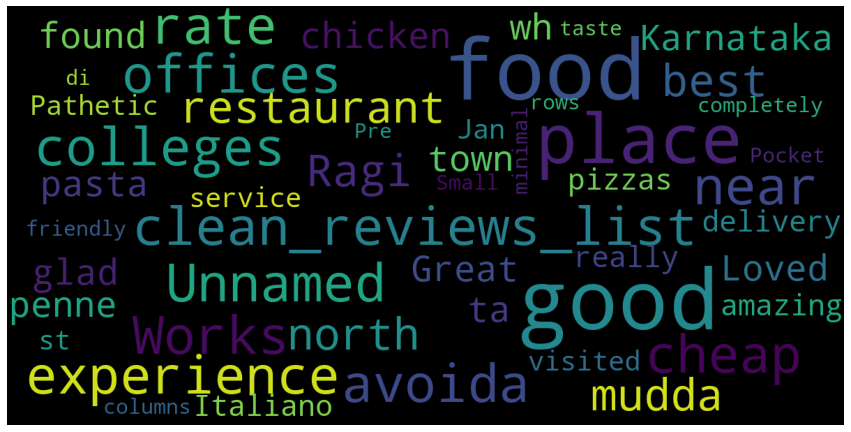

<Figure size 432x288 with 0 Axes>

In [48]:
print("Wordcloud of text where the rating is less than 4 and greater than 3")
show_wordcloud(dataframe[["clean_reviews_list", "rate"]][(dataframe.rate >=3) & (dataframe.rate< 4)], rating = '4')

Wordcloud of text where the rating is less than 5 and greater than 4


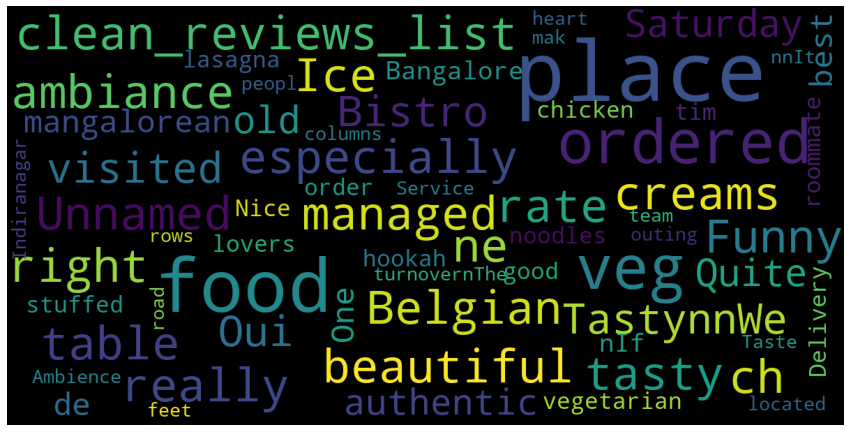

<Figure size 432x288 with 0 Axes>

In [49]:
print("Wordcloud of text where the rating is less than 5 and greater than 4")
show_wordcloud(dataframe[["clean_reviews_list", "rate"]][(dataframe.rate >=4) & (dataframe.rate< 5)], rating = '5')

The restaurants that have rating above 3 have positive words in them

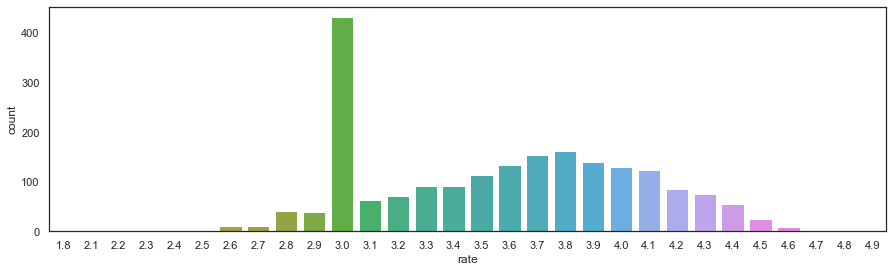

In [50]:
# # 13 Rating across restaurants
f, ax = plt.subplots(1,1, figsize = (15, 4))
ax = sns.countplot(dataframe[dataframe['rate'] != 0]['rate'])

Most restarants ahve rating between 3 - 4.7

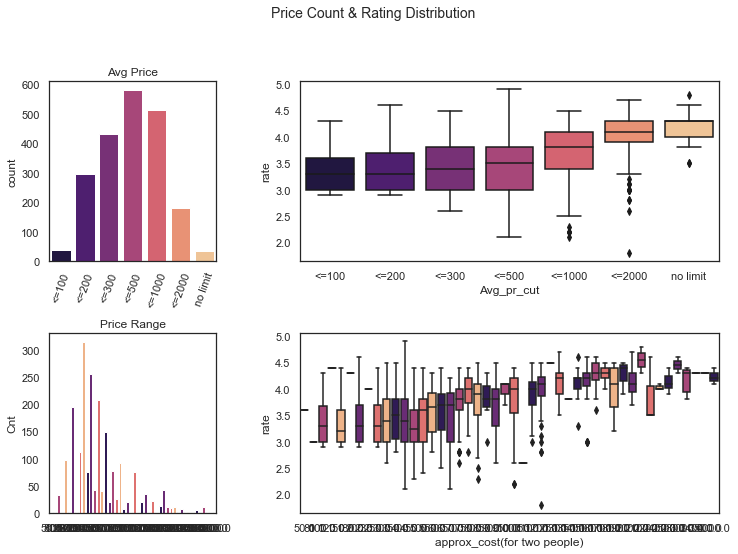

In [51]:
# 17) price range for all the restaurants.
f = plt.figure(figsize = (12,8))
dataframe['Avg_pr_cut'] = pd.cut(dataframe['approx_cost(for two people)'], bins = [0, 100, 200, 300, 500, 1000,2000, 800000000], labels = ['<=100', '<=200', '<=300', '<=500', '<=1000', '<=2000', 'no limit'])
ax = plt.subplot2grid((2,3), (0,0))
sns.countplot(dataframe['Avg_pr_cut'], ax = ax, palette = sns.color_palette('magma', 7))
ax.set_title('Avg Price')
ax.set_xlabel('')
ax.tick_params('x', rotation = 70)
ax = plt.subplot2grid((2,3), (0,1), colspan = 2)
sns.boxplot(x = 'Avg_pr_cut', y = 'rate', data = dataframe, ax = ax, palette = sns.color_palette('magma', 7))

cnt = dataframe['approx_cost(for two people)'].value_counts().reset_index()
cnt.columns = ['approx_cost(for two people)', 'Cnt']
ax = plt.subplot2grid((2,3), (1,0))
sns.barplot(x = 'approx_cost(for two people)', y = 'Cnt', data = cnt, ax=ax, palette = sns.color_palette('magma', 5))
ax.set_title('Price Range')
ax.set_xlabel('')
ax = plt.subplot2grid((2,3), (1,1), colspan = 2)
sns.boxplot(x='approx_cost(for two people)', y ='rate', data = dataframe, ax = ax, palette = sns.color_palette('magma', 5))
plt.subplots_adjust(wspace = 0.5, hspace = 0.4, top = 0.85)
plt.suptitle('Price Count & Rating Distribution', size = 14)
plt.show()

The above plots give us an understanding if there are any outliers in the data or not.

Ex: Price range of above 1000 have few outliers in them.

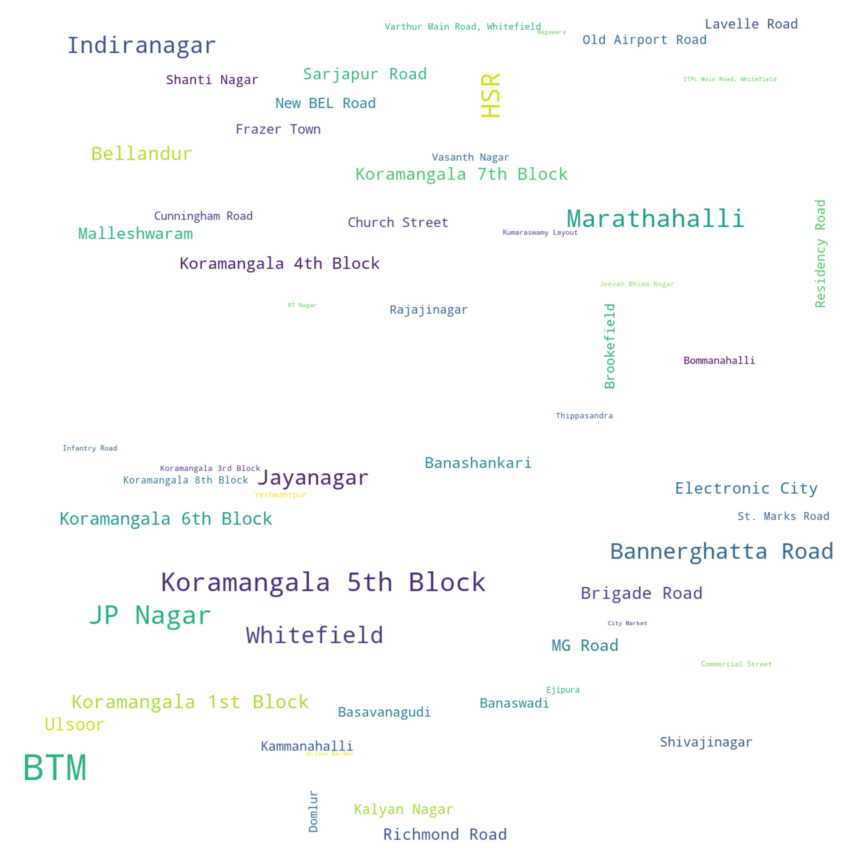

In [52]:
#word cloud - location with maximum Restaurants
maskCity = np.array(Image.open( "./images/skull.jpg"))

wordcloud = (WordCloud( max_words=100,width=1440, height=1080,max_font_size=60, min_font_size=10, relative_scaling=0.5,mask=maskCity,background_color='white').generate_from_frequencies(dataframe['location'].value_counts()))

fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud,interpolation="gaussian")
plt.axis('off')
plt.show()

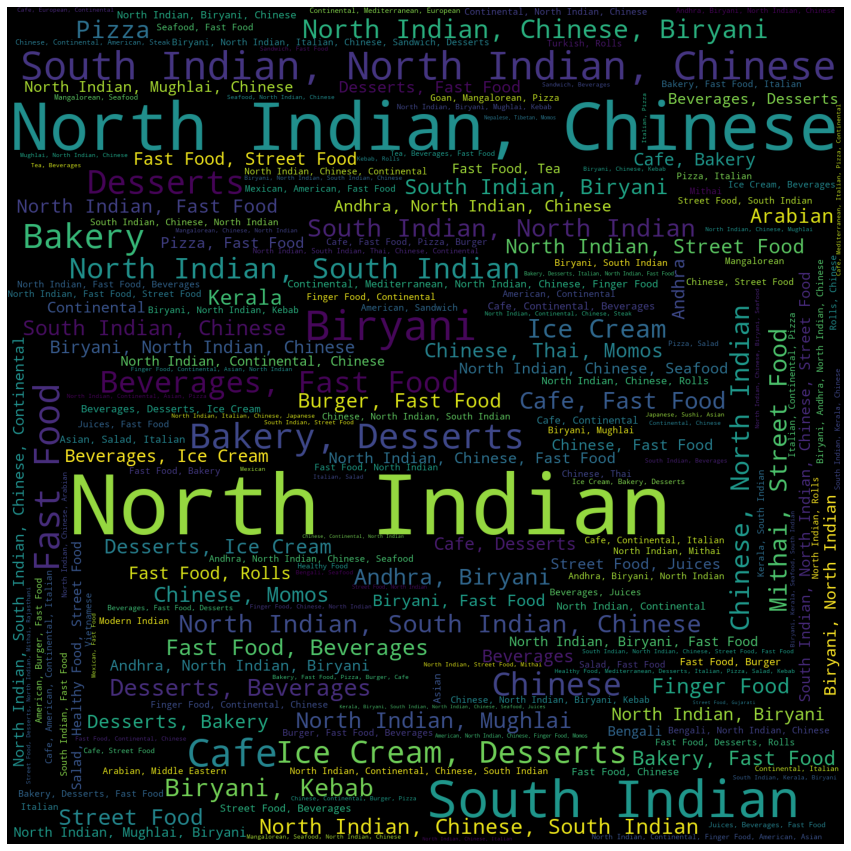

In [53]:
#Word cloud for cuisines -- lets see some popular cusines 
wave_mask = np.array(Image.open( "./images/skull.jpg"))
wordcloud = (WordCloud(width=1440, height=1080, mask = wave_mask, relative_scaling=0.5, stopwords=stopwords, background_color='black').generate_from_frequencies(dataframe['cuisines'].value_counts()))

fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

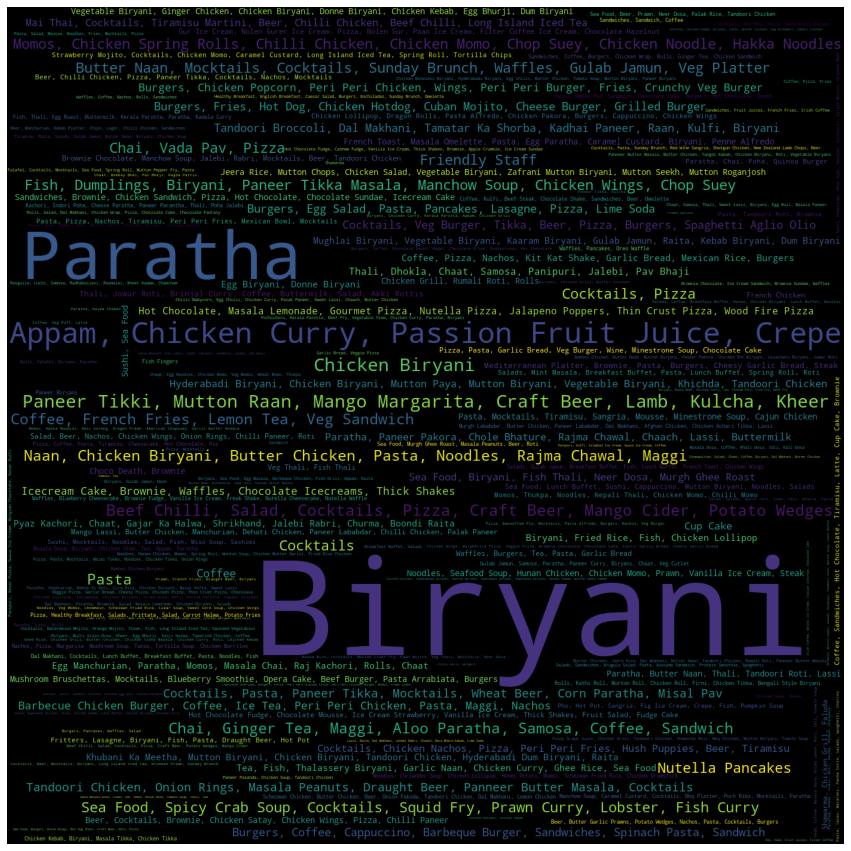

In [54]:
#Word cloud for dish liked the most -- lets see some popular dishes
wave_mask = np.array(Image.open( "./images/skull.jpg"))
wordcloud = (WordCloud(width=1440, height=1080, mask = wave_mask, relative_scaling=0.5, stopwords=stopwords, background_color='black').generate_from_frequencies(dataframe['dish_liked'].value_counts()))

fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

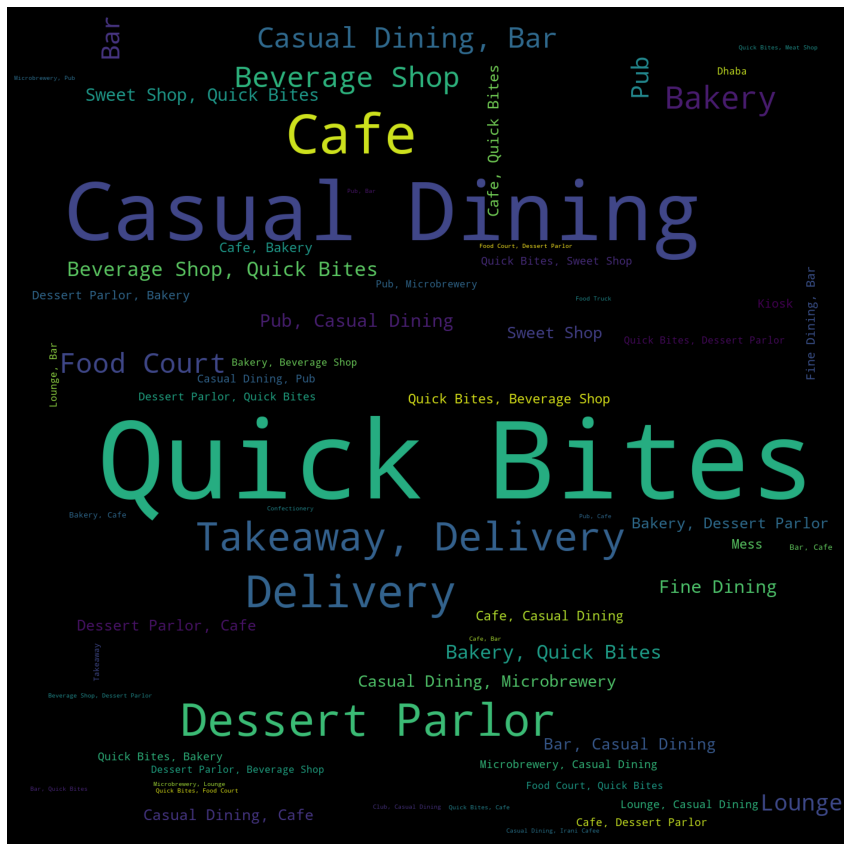

In [55]:
#Word cloud for types of restaurants -- lets see some popular restaurants types
wave_mask = np.array(Image.open( "./images/skull.jpg"))
wordcloud = (WordCloud(width=1440, height=1080, mask = wave_mask, relative_scaling=0.5, stopwords=stopwords, background_color='black').generate_from_frequencies(dataframe['rest_type'].value_counts()))

fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

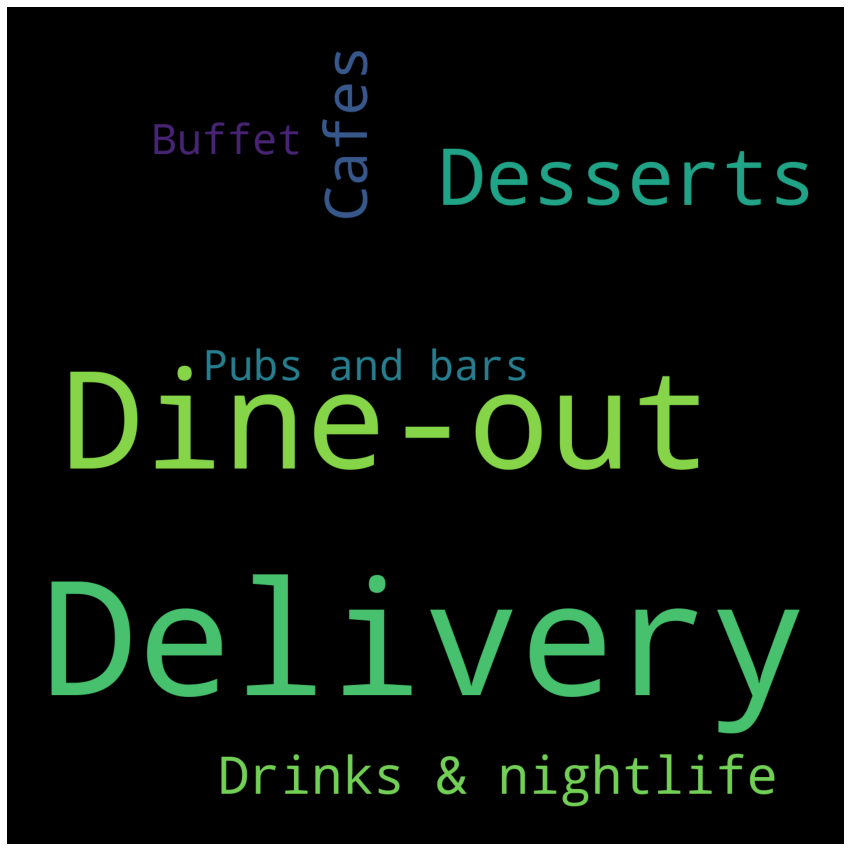

In [56]:
#Word cloud for restaurants service type -- lets see some popular service of restaurants
wave_mask = np.array(Image.open( "./images/skull.jpg"))
wordcloud = (WordCloud(width=1440, height=1080, mask = wave_mask, relative_scaling=0.5, stopwords=stopwords, background_color='black').generate_from_frequencies(dataframe['listed_in(type)'].value_counts()))

fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

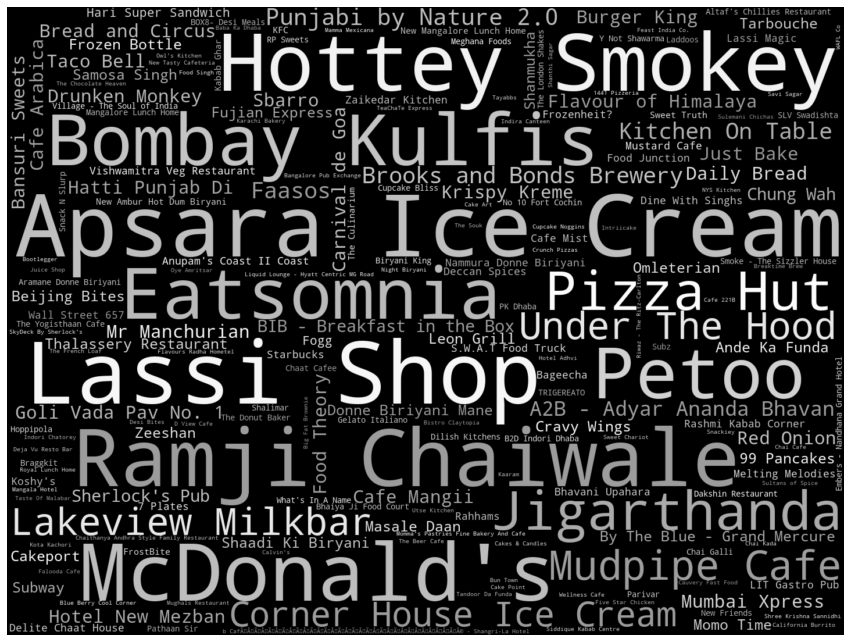

In [57]:
#lets see which restaurant got the most shout-out 
#Grey color function
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % np.random.randint(60, 100)

#Main WordCloud Code
wc = (WordCloud(width=1440, height=1080, relative_scaling=0.5, stopwords=stopwords).generate_from_frequencies(dataframe['name'].value_counts()))

fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

# Summarizing all the observations and suggestions from the above plots or EDA.

In [58]:
print("""Output -> Reporting the output.
59% of the orders are from online orders.
41% of the orders are not from online orders.
Suggestions
i) The key point of drivng the business is online orders.
ii) The restaurant should keep or improve the quality of online services that will attract even more number of customers. Though online customers are more we can increase evn more.
iii) If a new investor is planning to invest in this industry then his investment should be with online orders or online app.
iv) If a new investor wants to enter the market of food industry then his prime focus should be on online deliveries or online application to get started with. Because most of the customers are ordering online5

Output -> Reporting the output.
87% of the customers have done table bookings
13% of the customers visit the restaurant without table bookings.
Suggestion
i) Since online orders are more table bookings have also been reduced or less.
ii) If a new investor wants to enter the market of food industry and wants to open a food chain of restaurants then his investment should be as minimal as possible on the decoration or initial investory of chairs and tables. Because most of the people are ordering online.

Output -> Reporting the output.
In listed_in(type) column
Mode of ordering the food
51% of the orders are from online in delivery section in the given dataset.
36% of the orders are from dineout section in the given dataset.
6% of the orders are from desserts section in the given dataset.
3% of the orders are from Cafes section in the given dataset.
2% of the orders are from drinks & nightlife section in the given dataset.
1% of the orders are from pubs and Bars section in the given dataset.
1% of the orders are from Buffet section in the given dataset.
Suggestions
i) If a new investor wants to enter the market of food industry and wants to know which dine-out would attract more customers then I would suggest him going for Dine-out or delivery rather than pubs or desserts or bar, etc.

Key findings
1) The average rating is 3.5
2) 75% of the distribution is under 3.9 rating
3) 25% of the restaurants have rating 4.0 and above

votes can be with respect to the voting given to a order or restaurant.
75% of the data has voting less than or equal to 210 votes
25% of the data has voting greater than or 210 votes

The average votes for restaurants are around 276. There are few (25%) restaurants for which the votes are above 210 to 8000. We can replace all these values by mean values. To get proper distribution of the graph


Key insights
i) Among all the restaurants the average cost for two people is coming upto 561 in this city for which the data is provided. (Bangalore) From the above distribution we get an understanding that the data has been taken from all types of restaurants cost friendly and expensive.
Suggestions:
If a investor wants to invest or enter the market then he can decide the cost of his dishes or the average cost for two people in his retaurant. A brilliant solution to capture the market he can decide to keep it around 561.

The above plot is with respect to aprroximate cost fo two.
In the above provided dataset the average cost for two is around 561. And 75% of the data lies within 650. Since only 25% of the restaurants belong to category of above 650, we can either remove those restautants, by removing these restaurants we can have the data that belongs to a normal distribution.
The above plot is right skewed.


Key insights and Suggestions
The above box plot will help the owner or investor to set a cap on his prices for the dishes that he provides.
For example median willl tell him to set the prices for most of his dishes.
And with the help of upper and lower whisker and Q1 and Q3 range he can decide most of his food or product prices.
The price range should be in this range so that he can capture more number of customers in the market. (Ex: min - 50 to max - 1100)
From the above plot we understand how much people spend on food.

Key suggestions and insights
Based on the above box plot the invester or owner who is trying to enter the market or an existing restaurant can decide what shoudl be the range of prices for hsi or her food items. Based on the mode. If he is planning for more of online orders delivery then he can refer to the online order yes data or left boxplot. and if he is planing for an offline restaurant then he can refer the right plot or online order no plot.

Insights
1) Most of the retsurants are from BTM Layout location

Suggestions -> Most of the resturants serve north indian dishes

North indian dish is most served cuisine among the restaurants

The most common words in rating less than 1 are Dataframe, Index, rate, columns. We can remove these words


Key insights
The wordcloud helped me in understanding what are the words associated with the ratings (rate column).
The restaurants rated low around 1 or 2 had negative words. Example: "cheap"
The restaurants rated high around 4 or 5 had positive words. Example: "beautiful", "Best"
This helps us in understading that the if positive words are there in the review list then the rate or rating for that restaurant is good else it is bad rated based on the negtaive words.
The wordcloud also helped me in understand the most common and unwanted words like "rated_n"," review_list"

We will perform some text cleaning in the data.
Removing the text from the list

Remove punctuations,

non ascii words

"rated" word as it is repeated more often

New line characters and following text untill space

Extra spaces from the text

Remove all punctuation

Remove all stopwords

Remove the ratings that are there at the starting of the text.

The restaurants that have rating below 2 have few words that are negative eg: sucks, cheap

The restaurants that have rating above 3 have positive words in them

The above plots give us an understanding if there are any outliers in the data or not.

Ex: Price range of above 1000 have few outliers in them.

""")

Output -> Reporting the output.
59% of the orders are from online orders.
41% of the orders are not from online orders.
Suggestions
i) The key point of drivng the business is online orders.
ii) The restaurant should keep or improve the quality of online services that will attract even more number of customers. Though online customers are more we can increase evn more.
iii) If a new investor is planning to invest in this industry then his investment should be with online orders or online app.
iv) If a new investor wants to enter the market of food industry then his prime focus should be on online deliveries or online application to get started with. Because most of the customers are ordering online5

Output -> Reporting the output.
87% of the customers have done table bookings
13% of the customers visit the restaurant without table bookings.
Suggestion
i) Since online orders are more table bookings have also been reduced or less.
ii) If a new investor wants to enter the market of food i